# Speech Emotion Recognition

### Algorithm used:

* Gradient Boosting
* Decision Tree
* Gaussian Naive Bayes
* MLP Classifier
* Random Forest
* AdaBoost
* KNN
* Logistic Regression
* Support Vector Machine (RBF & Linear)
* Stochastic Gradient Descent


### Databases used

* Toronto emotional speech set (TESS)

### Reference
* [Recognizing Speech Emotion Based on Acoustic
Features Using Machine Learning](https://aiubedu60714-my.sharepoint.com/personal/manjurul_aiub_edu/Documents/Microsoft%20Teams%20Chat%20Files/Recognizing_Speech_Emotion_Based_on_Acoustic_Features_Using_Machine_Learning.pdf)

### Import Libraries

Import necessary libraries

In [1]:
import glob
import os
import librosa
import time
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
tess_emotions=['angry','disgust','fear','happy', 'neutral', 'ps', 'sad']

In [3]:
def extract_feature(file_name):
    
    X, sample_rate = librosa.load(os.path.join(file_name), res_type='kaiser_fast')
    result = np.array([])
    
    stft = np.abs(librosa.stft(X))
    chromas = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chromas))

    mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    result=np.hstack((result, mfccs))

    mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128).T, axis=0)
    result = np.hstack((result, mels))
        
    return result
    

In [4]:
def load_data(): 
    sound, emo =[],[]

    for file in glob.glob("/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/*AF_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=file_name.split("_")[2][:-4] #split and remove .wav
        sound.append(file)
        emo.append(emotion)

    return {"file": sound, "emotion": emo}

In [5]:
start_time = time.time()

Trial_dict = load_data()

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 0.6895534992218018 seconds ---


In [6]:
X = pd.DataFrame(Trial_dict["file"])
y = pd.DataFrame(Trial_dict["emotion"])

In [7]:
X.shape, y.shape

((2800, 1), (2800, 1))

In [8]:
y.value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
dtype: int64

In [9]:
# X_features = X[0].swifter.progress_bar(enable=True).apply(lambda x: extract_feature(x))

X_features =[]

for x in tqdm(X[0]):
#     print(x)
    X_features.append(extract_feature(x))

100%|██████████| 2800/2800 [03:35<00:00, 13.01it/s]


In [10]:
X_features = pd.DataFrame(X_features)

In [11]:
#renaming the label column to emotion
y=y.rename(columns= {0: 'emotion'})

In [12]:
#concatinating the attributes and label into a single dataframe
data = pd.concat([X_features, y], axis =1)

In [13]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,emotion
0,0.512758,0.497734,0.431716,0.419827,0.436938,0.563250,0.518461,0.359903,0.378070,0.406273,...,0.021686,0.030651,0.020063,0.005756,0.001101,0.000849,0.000332,0.000079,0.000010,fear
1,0.520820,0.458475,0.392486,0.400075,0.573808,0.542263,0.396899,0.353021,0.446890,0.439405,...,0.003428,0.003905,0.003689,0.001623,0.000328,0.000201,0.000069,0.000020,0.000003,fear
2,0.585928,0.472682,0.420355,0.407791,0.384469,0.526176,0.391544,0.324338,0.347983,0.459437,...,0.005155,0.008028,0.007958,0.004337,0.001316,0.000201,0.000110,0.000021,0.000004,fear
3,0.623963,0.624775,0.541450,0.431444,0.405145,0.462276,0.539079,0.459980,0.434310,0.513889,...,0.020697,0.021172,0.021116,0.010168,0.002111,0.001089,0.000506,0.000129,0.000009,fear
4,0.661883,0.603584,0.526659,0.503848,0.459024,0.411262,0.477835,0.464971,0.450117,0.465463,...,0.005312,0.007051,0.007116,0.002116,0.000407,0.000197,0.000072,0.000021,0.000002,fear


## Shuffling data#reindexing to shuffle the data at random
data = data.reindex(np.random.permutation(data.index))

In [14]:
#reindexing to shuffle the data at random
data = data.reindex(np.random.permutation(data.index))

In [15]:
# Storing shuffled ravdess and tess data to avoid loading again
data.to_csv("TESS_FEATURES.csv")

In [16]:
starting_time = time.time()
data = pd.read_csv("./TESS_FEATURES.csv")
print("data loaded in " + str(time.time()-starting_time) + "ms")

print(data.head())

data loaded in 0.14349079132080078ms
   Unnamed: 0         0         1         2         3         4         5  \
0        1102  0.532837  0.604629  0.519857  0.359816  0.447430  0.474637   
1        2679  0.604650  0.573853  0.515604  0.442713  0.447533  0.438654   
2         744  0.482259  0.411939  0.398448  0.434461  0.511868  0.483215   
3         358  0.596318  0.591567  0.445937  0.347497  0.364111  0.368814   
4        1183  0.475144  0.446774  0.435284  0.366404  0.390159  0.426727   

          6         7         8  ...       171       172       173       174  \
0  0.425402  0.488694  0.519100  ...  0.007520  0.006717  0.005800  0.001290   
1  0.471955  0.555622  0.624326  ...  0.003173  0.003185  0.002316  0.001058   
2  0.472110  0.510454  0.498934  ...  0.000327  0.000205  0.000123  0.000065   
3  0.402967  0.393635  0.355156  ...  0.000242  0.000197  0.000088  0.000037   
4  0.493961  0.666269  0.565801  ...  0.017248  0.021892  0.013110  0.003219   

        175       1

In [17]:
data.shape

(2800, 182)

In [18]:
#printing all columns
data.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '171', '172', '173', '174', '175', '176', '177', '178', '179',
       'emotion'],
      dtype='object', length=182)

In [19]:
#dropping the column Unnamed: 0 to removed shuffled index
data = data.drop('Unnamed: 0',axis=1)

In [20]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '171', '172', '173', '174', '175', '176', '177', '178', '179',
       'emotion'],
      dtype='object', length=181)

In [21]:
#separating features and target outputs
X = data.drop('emotion', axis = 1).values
y = data['emotion'].values

In [22]:
print(y)

['angry' 'ps' 'disgust' ... 'disgust' 'ps' 'happy']


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
X.shape, y.shape

((2800, 180), (2800,))

In [25]:
np.unique(y)

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad'],
      dtype=object)

# Importing sklearn libraries

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Cross Validation Parameters

In [27]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state=0)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

# SVC - RBF

In [28]:
from sklearn.svm import SVC
svclassifier = SVC(kernel = 'rbf')

### Without Scaling

Accuracy should be lower than scaled

In [29]:
import time

starting_time = time.time()

svclassifier.fit(X_train, y_train)
print("Trained model in %s ms " % str(time.time() - starting_time))

Trained model in 0.1586766242980957 ms 


In [30]:
train_acc = float(svclassifier.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svclassifier.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

----train accuracy score 87.0 ----
----test accuracy score 87.28571428571429 ----


### With Scaling 

In [31]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('SVM', SVC(kernel = 'rbf'))]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: svc_scaled
svc_scaled = pipeline.fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(svc_scaled.score(X_test, y_test)))


Accuracy with Scaling: 0.975


### Cross Validation

In [32]:
cv_results2 = cross_val_score(pipeline, X, y, cv=cv, n_jobs=-1)
print(cv_results2)
print("Average:", np.average(cv_results2))

[0.98928571 0.97857143 0.97857143 0.99285714 0.98214286 0.99285714
 0.98214286 0.97321429 0.98928571 0.9875     0.9875     0.99107143
 0.9875     0.98035714 0.9875     0.98392857 0.9875     0.98928571
 0.98214286 0.9875     0.99107143 0.98214286 0.9875     0.97142857
 0.99285714 0.98571429 0.98392857 0.99285714 0.98928571 0.9875
 0.9875     0.9875     0.99642857 0.98035714 0.98571429 0.98392857
 0.98928571 0.98214286 0.98392857 0.98571429 0.97857143 0.98928571
 0.98571429 0.99107143 0.98214286 0.98392857 0.98571429 0.98392857
 0.98214286 0.97857143]
Average: 0.9855714285714285


### Generalization check

In [33]:
train_acc = float(svc_scaled.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svc_scaled.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

----train accuracy score 99.92857142857143 ----
----test accuracy score 97.5 ----


In [34]:
scaled_predictions = svc_scaled.predict(X_test)

### Classification reports and Confusion Matrix

              precision    recall  f1-score   support

       angry       1.00      0.95      0.97       215
     disgust       1.00      1.00      1.00       210
        fear       0.98      0.91      0.95       205
       happy       0.87      0.99      0.92       196
     neutral       1.00      1.00      1.00       195
          ps       0.99      0.98      0.99       188
         sad       1.00      0.99      1.00       191

    accuracy                           0.97      1400
   macro avg       0.98      0.98      0.98      1400
weighted avg       0.98      0.97      0.98      1400

----accuracy score 97.5 ----


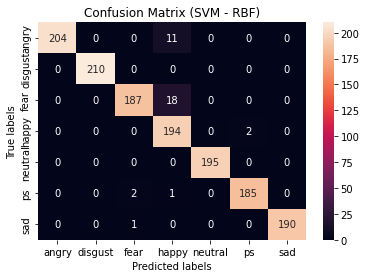

In [35]:
print(classification_report(y_test,scaled_predictions))

acc = float(accuracy_score(y_test,scaled_predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,scaled_predictions)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix (SVM - RBF)'); 
ax.xaxis.set_ticklabels(tess_emotions);
ax.yaxis.set_ticklabels(tess_emotions);

# SVM - Linear

In [36]:
from sklearn.svm import LinearSVC

steps2 = [('scaler', StandardScaler()),
          ('LinearSVM', LinearSVC())]

svml = Pipeline(steps2)

svml_res = svml.fit(X_train, y_train)

print('Accuracy with Scaling: {}'.format(svml.score(X_test, y_test)))

Accuracy with Scaling: 0.9835714285714285


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [37]:
svml_train_acc = float(svml_res.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % svml_train_acc)

svml_test_acc = float(svml_res.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % svml_test_acc)

----train accuracy score 100.0 ----
----test accuracy score 98.35714285714286 ----


In [38]:
svml_score = cross_val_score(svml, X, y, cv=cv, n_jobs=-1)
print(svml_score)
print("Average:", np.average(svml_score))

[0.98035714 0.99107143 0.99107143 0.98392857 0.98928571 0.98035714
 0.98571429 0.9875     0.99107143 0.99642857 0.99107143 0.99464286
 0.99107143 0.99285714 0.98928571 0.99642857 0.98928571 0.99285714
 0.98928571 0.98571429 0.99107143 0.99464286 0.98928571 0.98214286
 0.98392857 0.99285714 0.99285714 0.98928571 0.99642857 0.9875
 0.98928571 0.98928571 0.99107143 0.99464286 0.98392857 0.98214286
 0.99107143 0.99285714 0.98392857 0.9875     0.98392857 0.98928571
 0.99107143 0.98928571 0.9875     0.9875     0.99821429 0.99107143
 0.98571429 0.99642857]
Average: 0.9895000000000002


In [39]:
svml_pred = svml_res.predict(X_test)
print(svml_pred)

['sad' 'disgust' 'fear' ... 'fear' 'neutral' 'neutral']


              precision    recall  f1-score   support

       angry       1.00      0.99      1.00       215
     disgust       0.99      0.99      0.99       210
        fear       0.99      0.95      0.97       205
       happy       0.98      0.97      0.98       196
     neutral       1.00      1.00      1.00       195
          ps       0.93      0.98      0.95       188
         sad       0.99      1.00      1.00       191

    accuracy                           0.98      1400
   macro avg       0.98      0.98      0.98      1400
weighted avg       0.98      0.98      0.98      1400

----accuracy score 98.35714285714286 ----


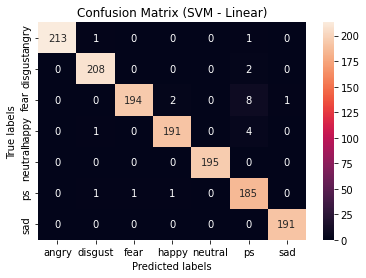

In [40]:
print(classification_report(y_test,svml_pred))

acc_svml = float(accuracy_score(y_test,svml_pred))*100
print("----accuracy score %s ----" % acc_svml)

cm_svml = confusion_matrix(y_test,svml_pred)

# df_cm_svml = pd.DataFrame(cm_svml)
# sn.heatmap(df_cm_svml, annot=True, fmt='')
# plt.show()

ax= plt.subplot()
sns.heatmap(cm_svml, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix (SVM - Linear)'); 
ax.xaxis.set_ticklabels(tess_emotions);
ax.yaxis.set_ticklabels(tess_emotions);

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier()
rfm_score = cross_val_score(rfm, X, y, cv=cv, n_jobs=-1)
print(rfm_score)
print("Average:", np.average(rfm_score))

[0.99642857 0.99821429 0.99642857 0.99821429 0.99285714 0.99821429
 0.99285714 0.99642857 0.99285714 0.99464286 0.99464286 0.99642857
 0.99821429 0.99107143 0.99464286 0.99821429 0.99464286 0.99285714
 1.         0.99642857 0.99642857 0.99642857 0.99107143 1.
 0.99285714 0.99464286 0.99464286 0.99821429 1.         0.99464286
 0.99642857 0.99821429 0.99285714 0.99642857 0.99642857 0.99464286
 0.99464286 0.99464286 0.99821429 0.99642857 0.99642857 0.99821429
 0.99285714 0.99642857 0.99821429 0.99285714 0.99821429 0.99821429
 0.99464286 0.99821429]
Average: 0.9959285714285714


In [42]:
rfm_res = rfm.fit(X_train, y_train)

rfm_train_acc = float(rfm_res.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % rfm_train_acc)

rfm_test_acc = float(rfm_res.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % rfm_test_acc)

----train accuracy score 100.0 ----
----test accuracy score 99.5 ----


In [43]:
rfm_pred = rfm_res.predict(X_test)

              precision    recall  f1-score   support

       angry       1.00      1.00      1.00       215
     disgust       1.00      1.00      1.00       210
        fear       1.00      1.00      1.00       205
       happy       0.99      0.98      0.98       196
     neutral       1.00      1.00      1.00       195
          ps       0.98      0.98      0.98       188
         sad       0.99      1.00      1.00       191

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400

----accuracy score 99.5 ----


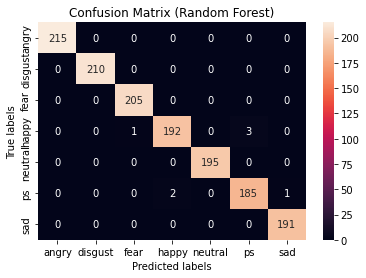

In [44]:
print(classification_report(y_test,rfm_pred))

acc = float(accuracy_score(y_test,rfm_pred))*100
print("----accuracy score %s ----" % acc)

cm_rfm = confusion_matrix(y_test,rfm_pred)

ax= plt.subplot()
sns.heatmap(cm_rfm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix (Random Forest)'); 
ax.xaxis.set_ticklabels(tess_emotions);
ax.yaxis.set_ticklabels(tess_emotions);

# Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

nbm = GaussianNB().fit(X_train, y_train)

nbm_train_acc = float(nbm.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % nbm_train_acc)

nbm_test_acc = float(nbm.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % nbm_train_acc)

----train accuracy score 81.35714285714286 ----
----test accuracy score 81.35714285714286 ----


In [46]:
nbm_score = cross_val_score(nbm, X, y, cv=cv, n_jobs=-1)
print(nbm_score)
print("Average:", np.average(nbm_score))

[0.83214286 0.79464286 0.81785714 0.81607143 0.78392857 0.80178571
 0.80714286 0.81964286 0.8125     0.80178571 0.80535714 0.80714286
 0.82321429 0.81071429 0.80892857 0.80178571 0.81785714 0.8125
 0.79107143 0.8        0.8125     0.84107143 0.80178571 0.77857143
 0.82142857 0.825      0.79464286 0.8125     0.81071429 0.8125
 0.79464286 0.81428571 0.81607143 0.80535714 0.80714286 0.83571429
 0.80535714 0.80357143 0.79464286 0.79642857 0.80178571 0.82678571
 0.79821429 0.79285714 0.82321429 0.79642857 0.79107143 0.80714286
 0.84464286 0.80714286]
Average: 0.8087857142857142


In [47]:
nbm_pred = nbm.predict(X_test)
print(nbm_pred)

['sad' 'disgust' 'fear' ... 'fear' 'neutral' 'neutral']


              precision    recall  f1-score   support

       angry       0.96      0.90      0.93       215
     disgust       0.55      0.82      0.66       210
        fear       0.86      0.90      0.88       205
       happy       0.85      0.48      0.61       196
     neutral       1.00      0.99      0.99       195
          ps       0.82      0.52      0.63       188
         sad       0.76      1.00      0.86       191

    accuracy                           0.80      1400
   macro avg       0.83      0.80      0.80      1400
weighted avg       0.83      0.80      0.80      1400

----accuracy score 80.42857142857143 ----


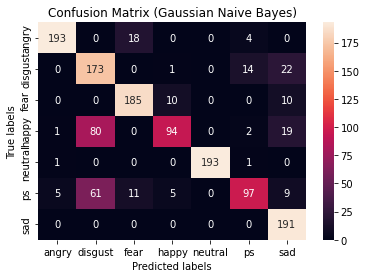

In [48]:
print(classification_report(y_test,nbm_pred))

acc_nbm = float(accuracy_score(y_test,nbm_pred))*100
print("----accuracy score %s ----" % acc_nbm)

cm_nbm = confusion_matrix(y_test,nbm_pred)

ax= plt.subplot()
sns.heatmap(cm_nbm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix (Gaussian Naive Bayes)'); 
ax.xaxis.set_ticklabels(tess_emotions);
ax.yaxis.set_ticklabels(tess_emotions);

# Logistic Regression

[Resource](https://www.datacamp.com/tutorial/understanding-logistic-regression-python)

In [49]:
from sklearn.linear_model import LogisticRegression

lrm = LogisticRegression(solver='liblinear').fit(X_train, y_train)

lrm_train_acc = float(lrm.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % lrm_train_acc)

lrm_test_acc = float(lrm.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % lrm_train_acc)

----train accuracy score 99.92857142857143 ----
----test accuracy score 99.92857142857143 ----


In [50]:
lrm_score = cross_val_score(lrm, X, y, cv=cv, n_jobs=-1)
print(lrm_score)
print("Average:", np.average(lrm_score))

[0.98928571 0.99464286 0.99464286 0.98928571 0.99107143 0.9875
 0.98928571 0.9875     0.99464286 0.99464286 0.99107143 0.99285714
 0.99107143 0.99107143 0.99285714 0.9875     0.99464286 0.99107143
 0.98928571 0.99107143 0.99464286 0.99285714 0.9875     0.99464286
 0.9875     0.99464286 0.99107143 0.99285714 0.98928571 0.99107143
 0.98928571 0.99464286 0.99285714 0.98571429 0.99107143 0.9875
 0.99642857 0.99285714 0.98928571 0.99464286 0.98928571 0.99107143
 0.99642857 0.9875     0.99107143 0.99464286 0.98571429 0.99464286
 0.98571429 0.99821429]
Average: 0.9913928571428572


In [51]:
lrm_pred = lrm.predict(X_test)
print(lrm_pred)

['sad' 'disgust' 'fear' ... 'fear' 'neutral' 'neutral']


              precision    recall  f1-score   support

       angry       0.99      1.00      1.00       215
     disgust       1.00      0.97      0.98       210
        fear       1.00      1.00      1.00       205
       happy       1.00      0.99      0.99       196
     neutral       0.99      1.00      1.00       195
          ps       0.97      0.99      0.98       188
         sad       0.99      1.00      1.00       191

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400

----accuracy score 99.21428571428571 ----


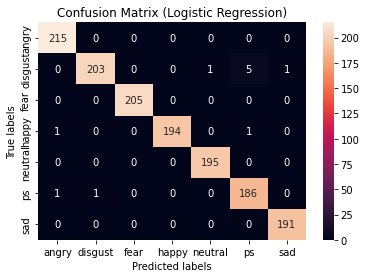

In [52]:
print(classification_report(y_test,lrm_pred))

acc_lrm = float(accuracy_score(y_test,lrm_pred))*100
print("----accuracy score %s ----" % acc_lrm)

cm_lrm = confusion_matrix(y_test,lrm_pred)

ax= plt.subplot()
sns.heatmap(cm_lrm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix (Logistic Regression)'); 
ax.xaxis.set_ticklabels(tess_emotions);
ax.yaxis.set_ticklabels(tess_emotions);

# Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=50)
dtc.fit(X_train, y_train)

dtc_train_acc = float(dtc.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % dtc_train_acc)

dtc_test_acc = float(dtc.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % dtc_train_acc)

----train accuracy score 100.0 ----
----test accuracy score 100.0 ----


In [54]:
dtc_score = cross_val_score(dtc, X, y, cv=cv, n_jobs=-1)
print(dtc_score)
print("Average:", np.average(dtc_score))

[0.93035714 0.925      0.90892857 0.92142857 0.90892857 0.90714286
 0.93214286 0.93392857 0.91785714 0.91785714 0.91428571 0.92142857
 0.91428571 0.92142857 0.92142857 0.92142857 0.90892857 0.89285714
 0.92321429 0.94285714 0.89642857 0.93214286 0.89821429 0.9125
 0.925      0.90357143 0.93035714 0.93928571 0.9375     0.93214286
 0.93035714 0.91428571 0.91964286 0.91071429 0.925      0.90892857
 0.92678571 0.94285714 0.92857143 0.92857143 0.9375     0.92857143
 0.90714286 0.9125     0.91785714 0.94642857 0.92678571 0.91964286
 0.925      0.94107143]
Average: 0.9218214285714285


In [55]:
dtc_pred = dtc.predict(X_test)
print(dtc_pred)

['sad' 'disgust' 'fear' ... 'fear' 'neutral' 'neutral']


              precision    recall  f1-score   support

       angry       0.90      0.92      0.91       215
     disgust       0.86      0.84      0.85       210
        fear       0.93      0.96      0.94       205
       happy       0.90      0.81      0.85       196
     neutral       0.98      0.99      0.98       195
          ps       0.83      0.83      0.83       188
         sad       0.91      0.97      0.94       191

    accuracy                           0.90      1400
   macro avg       0.90      0.90      0.90      1400
weighted avg       0.90      0.90      0.90      1400

----accuracy score 90.07142857142857 ----


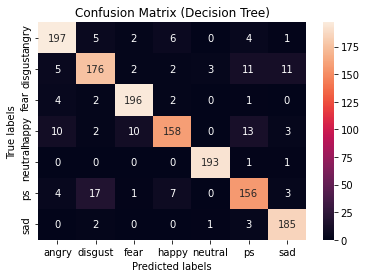

In [56]:
print(classification_report(y_test,dtc_pred))

acc_dtc = float(accuracy_score(y_test,dtc_pred))*100
print("----accuracy score %s ----" % acc_dtc)

cm_dtc = confusion_matrix(y_test,dtc_pred)


ax= plt.subplot()
sns.heatmap(cm_dtc, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix (Decision Tree)'); 
ax.xaxis.set_ticklabels(tess_emotions);
ax.yaxis.set_ticklabels(tess_emotions);

# AdaBoost

In [57]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier().fit(X_train, y_train)

abc_train_acc = float(abc.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % abc_train_acc)

abc_test_acc = float(abc.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % abc_train_acc)

----train accuracy score 27.285714285714285 ----
----test accuracy score 27.285714285714285 ----


In [58]:
abc_score = cross_val_score(abc, X, y, cv=cv, n_jobs=-1)
print(abc_score)
print("Average:", np.average(abc_score))

[0.29107143 0.2625     0.22678571 0.2875     0.2875     0.26964286
 0.24642857 0.29821429 0.2875     0.28214286 0.28928571 0.28571429
 0.2875     0.24642857 0.275      0.25535714 0.28214286 0.23214286
 0.30178571 0.27142857 0.25       0.27142857 0.29107143 0.2875
 0.2875     0.28214286 0.26428571 0.27321429 0.25357143 0.2875
 0.27857143 0.25535714 0.28571429 0.23214286 0.28392857 0.2875
 0.23928571 0.25       0.29642857 0.28214286 0.28928571 0.28214286
 0.26428571 0.25892857 0.25178571 0.275      0.27321429 0.29821429
 0.24464286 0.2625    ]
Average: 0.2721071428571428


In [59]:
abc_pred = abc.predict(X_test)
print(abc_pred)

['sad' 'ps' 'ps' ... 'ps' 'neutral' 'neutral']


----accuracy score 25.142857142857146 ----


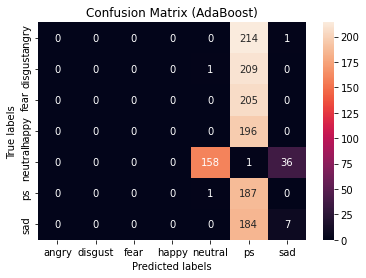

In [60]:
# print(classification_report(y_test,abc_pred))

acc_abc = float(accuracy_score(y_test,abc_pred))*100
print("----accuracy score %s ----" % acc_abc)

cm_abc = confusion_matrix(y_test,abc_pred)

ax= plt.subplot()
sns.heatmap(cm_abc, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix (AdaBoost)'); 
ax.xaxis.set_ticklabels(tess_emotions);
ax.yaxis.set_ticklabels(tess_emotions);

# SGD

In [61]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier().fit(X_train, y_train)

sgd_train_acc = float(sgd.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % sgd_train_acc)

sgd_test_acc = float(sgd.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % sgd_train_acc)

----train accuracy score 95.5 ----
----test accuracy score 95.5 ----


In [62]:
sgd_score = cross_val_score(sgd, X, y, cv=cv, n_jobs=-1)
print(sgd_score)
print("Average:", np.average(sgd_score))

[0.92678571 0.9125     0.93928571 0.97142857 0.76785714 0.91428571
 0.94642857 0.94464286 0.92321429 0.85178571 0.95714286 0.96785714
 0.88035714 0.89821429 0.87142857 0.96785714 0.97678571 0.95535714
 0.95357143 0.95892857 0.90892857 0.94107143 0.96428571 0.95
 0.95       0.88571429 0.97857143 0.97678571 0.97142857 0.97321429
 0.97142857 0.85       0.95178571 0.91785714 0.98571429 0.97142857
 0.97321429 0.93214286 0.97678571 0.97142857 0.975      0.93214286
 0.98214286 0.90892857 0.96428571 0.97142857 0.98214286 0.93035714
 0.94285714 0.97142857]
Average: 0.9409642857142856


In [63]:
sgd_pred = sgd.predict(X_test)
print(sgd_pred)

['sad' 'disgust' 'fear' ... 'fear' 'neutral' 'neutral']


----accuracy score 95.5 ----


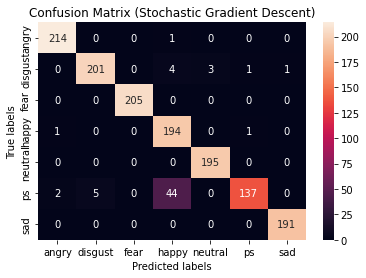

In [64]:
# print(classification_report(y_test,abc_pred))

acc_sgd = float(accuracy_score(y_test,sgd_pred))*100
print("----accuracy score %s ----" % acc_sgd)

cm_sgd = confusion_matrix(y_test,sgd_pred)

ax= plt.subplot()
sns.heatmap(cm_sgd, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix (Stochastic Gradient Descent)'); 
ax.xaxis.set_ticklabels(tess_emotions);
ax.yaxis.set_ticklabels(tess_emotions);

# Gradient Boosting

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier().fit(X_train, y_train)

gbc_train_acc = float(gbc.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % gbc_train_acc)

gbc_test_acc = float(gbc.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % gbc_train_acc)

----train accuracy score 100.0 ----
----test accuracy score 100.0 ----


In [66]:
# Very time consuming

gbc_score = cross_val_score(gbc, X, y, cv=cv, n_jobs=-1)
print(gbc_score)
print("Average:", np.average(gbc_score))

[0.99642857 0.9875     0.99107143 0.99821429 0.99642857 0.99642857
 0.99464286 0.99107143 0.99821429 0.99107143 0.99107143 0.98928571
 0.99821429 0.98928571 0.99464286 0.99285714 0.99821429 0.98571429
 0.99642857 0.99821429 0.99464286 0.99285714 0.99642857 0.9875
 1.         0.99642857 0.9875     0.99464286 0.99285714 0.99821429
 0.99464286 0.99642857 0.99107143 0.99642857 0.99285714 0.99642857
 0.99285714 0.99642857 0.99642857 0.98392857 0.99464286 0.99642857
 0.99285714 0.99642857 0.99285714 0.99464286 0.99821429 0.99821429
 0.99821429 0.98392857]
Average: 0.9939999999999999


In [67]:
gbc_pred = gbc.predict(X_test)
print(gbc_pred)

['sad' 'disgust' 'fear' ... 'fear' 'neutral' 'neutral']


              precision    recall  f1-score   support

       angry       0.99      1.00      0.99       215
     disgust       0.99      0.99      0.99       210
        fear       1.00      0.98      0.99       205
       happy       0.97      0.98      0.98       196
     neutral       0.99      0.99      0.99       195
          ps       0.97      0.97      0.97       188
         sad       1.00      0.99      0.99       191

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400

----accuracy score 98.64285714285714 ----


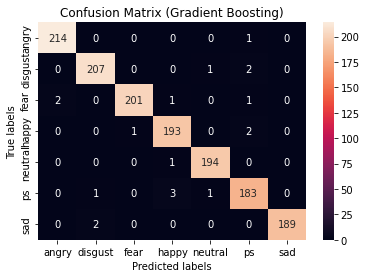

In [68]:
print(classification_report(y_test,gbc_pred))

acc_gbc = float(accuracy_score(y_test,gbc_pred))*100
print("----accuracy score %s ----" % acc_gbc)

cm_gbc = confusion_matrix(y_test,gbc_pred)

ax= plt.subplot()
sns.heatmap(cm_gbc, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix (Gradient Boosting)'); 
ax.xaxis.set_ticklabels(tess_emotions);
ax.yaxis.set_ticklabels(tess_emotions);

# MLP Classifier

In [69]:
from sklearn.neural_network import MLPClassifier

steps3 = [('scaler', StandardScaler()),
        ('MLP', MLPClassifier())]
        
pipeline_mlp = Pipeline(steps3)

mlp = pipeline_mlp.fit(X_train, y_train)

print('Accuracy with Scaling: {}'.format(mlp.score(X_test, y_test)))

Accuracy with Scaling: 0.995


In [70]:
mlp_train_acc = float(mlp.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % mlp_train_acc)

mlp_test_acc = float(mlp.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % mlp_train_acc)

----train accuracy score 100.0 ----
----test accuracy score 100.0 ----


In [71]:
mlp_res = cross_val_score(mlp, X, y, cv=cv, n_jobs=-1)
print(mlp_res)
print("Average:", np.average(mlp_res))

[0.99821429 0.99285714 0.99821429 0.99821429 0.99642857 1.
 0.99821429 0.99642857 0.99285714 1.         0.99821429 0.99642857
 0.99642857 0.99642857 0.99642857 0.99821429 0.99642857 0.99821429
 0.99464286 0.99821429 0.99821429 0.99821429 0.99642857 0.99464286
 0.99464286 1.         0.99107143 0.99821429 1.         0.99821429
 1.         0.99642857 0.99642857 0.99642857 0.99642857 0.99821429
 0.99642857 0.99821429 0.99642857 0.99642857 0.99464286 0.99642857
 0.99642857 0.99821429 0.99821429 0.99821429 0.99821429 0.99642857
 0.99464286 0.99821429]
Average: 0.9970357142857144


In [72]:
mlp_pred = mlp.predict(X_test)
print(mlp_pred)

['sad' 'disgust' 'fear' ... 'fear' 'neutral' 'neutral']


              precision    recall  f1-score   support

       angry       1.00      1.00      1.00       215
     disgust       1.00      1.00      1.00       210
        fear       1.00      0.99      0.99       205
       happy       0.98      0.98      0.98       196
     neutral       1.00      1.00      1.00       195
          ps       0.98      0.99      0.99       188
         sad       1.00      1.00      1.00       191

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       1.00      0.99      1.00      1400

----accuracy score 99.5 ----


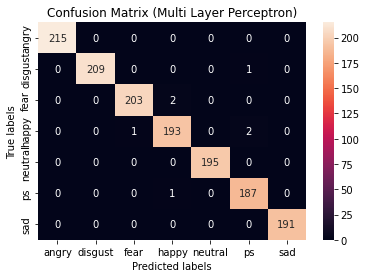

In [73]:
print(classification_report(y_test,mlp_pred))

acc_mlp = float(accuracy_score(y_test,mlp_pred))*100
print("----accuracy score %s ----" % acc_mlp)

cm_mlp = confusion_matrix(y_test,mlp_pred)

ax= plt.subplot()
sns.heatmap(cm_mlp, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix (Multi Layer Perceptron)'); 
ax.xaxis.set_ticklabels(tess_emotions);
ax.yaxis.set_ticklabels(tess_emotions);

# KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier

steps4 = [('scaler', StandardScaler()),
        ('KNN', KNeighborsClassifier())]
        
pipeline_knn = Pipeline(steps4)

knn = pipeline_mlp.fit(X_train, y_train)

print('Accuracy with Scaling: {}'.format(knn.score(X_test, y_test)))

Accuracy with Scaling: 0.9971428571428571


In [75]:
knn_train_acc = float(knn.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % knn_train_acc)

knn_test_acc = float(knn.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % knn_train_acc)

----train accuracy score 100.0 ----
----test accuracy score 100.0 ----


In [76]:
knn_res = cross_val_score(knn, X, y, cv=cv, n_jobs=-1)
print(knn_res)
print("Average:", np.average(knn_res))

[0.99642857 0.99821429 0.99821429 1.         0.99821429 0.99821429
 0.99821429 0.99642857 0.99642857 0.99642857 0.99821429 0.99821429
 0.99821429 0.99642857 0.99821429 0.99821429 0.99642857 0.99821429
 0.99821429 0.99821429 0.99821429 0.99642857 0.99821429 0.99821429
 0.99821429 0.99642857 0.98392857 1.         0.99821429 1.
 1.         0.99464286 1.         0.99642857 0.99464286 1.
 1.         0.99821429 0.99285714 0.99642857 0.99285714 1.
 0.99821429 0.99821429 0.99821429 0.99821429 0.99642857 0.99642857
 1.         1.        ]
Average: 0.9975


In [77]:
knn_pred = knn.predict(X_test)
print(knn_pred)

['sad' 'disgust' 'fear' ... 'fear' 'neutral' 'neutral']


              precision    recall  f1-score   support

       angry       1.00      1.00      1.00       215
     disgust       1.00      1.00      1.00       210
        fear       1.00      1.00      1.00       205
       happy       0.99      0.99      0.99       196
     neutral       1.00      1.00      1.00       195
          ps       0.99      0.99      0.99       188
         sad       1.00      1.00      1.00       191

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400

----accuracy score 99.71428571428571 ----


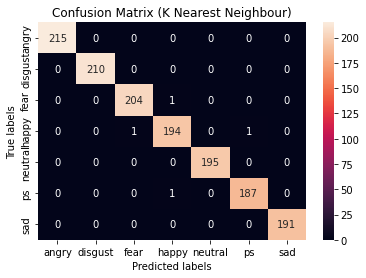

In [78]:
print(classification_report(y_test,knn_pred))

acc_knn = float(accuracy_score(y_test,knn_pred))*100
print("----accuracy score %s ----" % acc_knn)

cm_knn = confusion_matrix(y_test,knn_pred)

ax= plt.subplot()
sns.heatmap(cm_knn, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix (K Nearest Neighbour)'); 
ax.xaxis.set_ticklabels(tess_emotions);
ax.yaxis.set_ticklabels(tess_emotions);

# Comparison

In [79]:
paper_results = [0.8986, 0.9886, 0.7911, 0.79, 0.9929, 0.9089, 0.2643, 0.9757, 0.9875, 0.9964, 0.9886] # From paper

results = [np.average(cv_results2), np.average(svml_score), np.average(rfm_score), np.average(nbm_score), np.average(lrm_score), np.average(dtc_score), np.average(abc_score), np.average(sgd_score), np.average(gbc_score), np.average(mlp_res), np.average(knn_res)]
algo_labels = ['SVM (RBF)', 'SVM (Linear)', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'Decision Tree', 'AdaBoost', 'SGD', 'GradBoosting', 'MLP', 'KNN']

In [80]:
res_df = pd.DataFrame(results)
algo_df = pd.DataFrame(algo_labels)
pres_df = pd.DataFrame(paper_results)

algo_df=algo_df.rename(columns= {0: 'Classifier'})
res_df=res_df.rename(columns= {0: 'Acc'})
pres_df=pres_df.rename(columns= {0: 'Acc'})

res_df['Type'] = 'Ours'
pres_df['Type'] = 'Paper'

data_res1 = pd.concat([algo_df, res_df], axis =1)
data_res2 = pd.concat([algo_df, pres_df], axis =1)
data_res = pd.concat([data_res1, data_res2], axis=0)
data_res

,Classifier,Acc,Type
0,SVM (RBF),0.985571,Ours
1,SVM (Linear),0.989500,Ours
2,Random Forest,0.995929,Ours
3,Naive Bayes,0.808786,Ours
4,Logistic Regression,0.991393,Ours
5,Decision Tree,0.921821,Ours
6,AdaBoost,0.272107,Ours
7,SGD,0.940964,Ours
8,GradBoosting,0.994000,Ours
9,MLP,0.997036,Ours


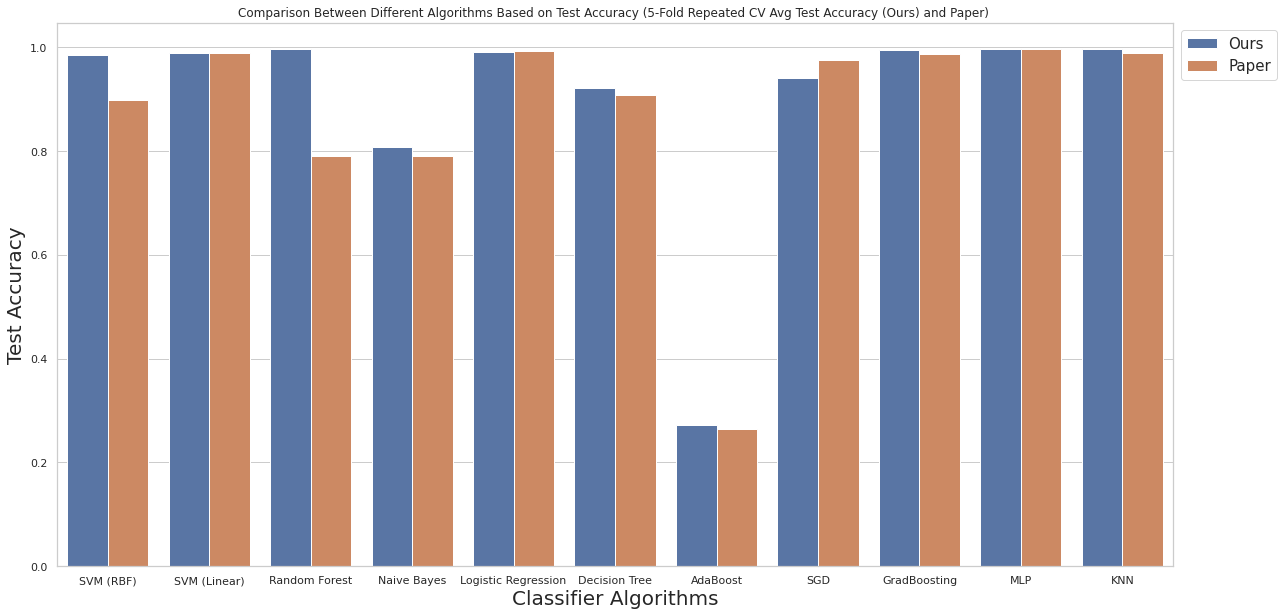

In [81]:
sns.set_theme(style='whitegrid')

plt.figure(figsize=(20,10))
ax = sns.barplot(data=data_res, x='Classifier', y='Acc', hue='Type', )

ax.set_xlabel('Classifier Algorithms', fontsize=20)
ax.set_ylabel('Test Accuracy', fontsize=20)
ax.set_title('Comparison Between Different Algorithms Based on Test Accuracy (5-Fold Repeated CV Avg Test Accuracy (Ours) vs Paper) ')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=15)